# Intercorrélation

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.grid'] = True

Intercorrélation sur un signal simple :

In [6]:
# Nombre d'échantillons
N = 100
n = np.arange(0,N)

# Motif
T = 10
m = np.where((n>=0) & (n<T), 1, 0 )

# Signal test
k = 33
x = np.where((n-k>=0) & (n-k<T), 1, 0 )

# Intercorrélation entre x et m
Rxm = np.correlate(x, m, mode='full')
nn  = np.arange(-(N-1), N)
imax = np.argmax(Rxm)

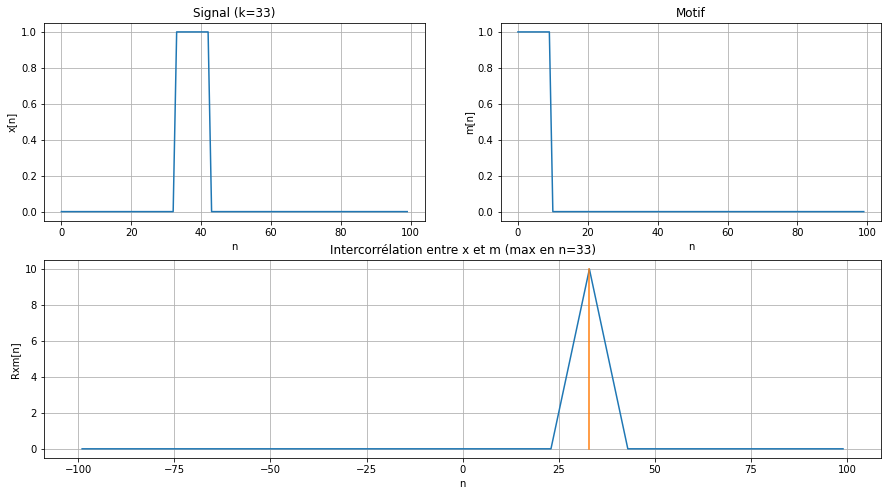

In [7]:
# Affichage
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
plt.plot(n,x)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title(f'Signal (k={k})')

plt.subplot(2,2,2)
plt.plot(n,m)
plt.xlabel('n')
plt.ylabel('m[n]')
plt.title('Motif')

plt.subplot(2,1,2)
plt.plot(nn,Rxm)
plt.plot([nn[imax], nn[imax]],[0, Rxm[imax]])
plt.xlabel('n')
plt.ylabel('Rxm[n]')
plt.title(f"Intercorrélation entre x et m (max en n={int(nn[imax])})")

plt.show()

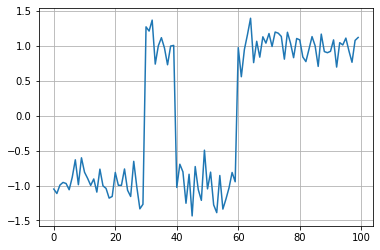

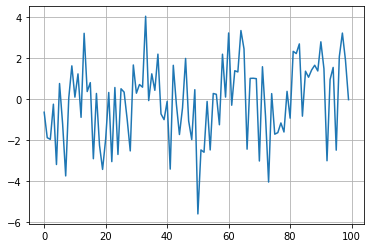

In [3]:
# Signal à charger

if True:
    
    dat = [
        [1, 0.2, [0, 0, 0, 1, 0, 0, 1, 1, 1, 1]], # 'O'
        [2, 1.5, [0, 0, 0, 1, 0, 0, 1, 0, 1, 1]], # 'K'
    ]
    
    for num, sig, msg in dat:

        h = np.ones(T)
        msg = np.array(msg)
        a = 2*msg - 1

        x = np.kron(a, h)
        b = np.random.normal(scale=sig, size=len(x))
        y = x + b

        plt.figure()
        plt.plot(y)
        np.savetxt(f'../_static/message{num}.csv', y)

Intercorrélation sur les messages :

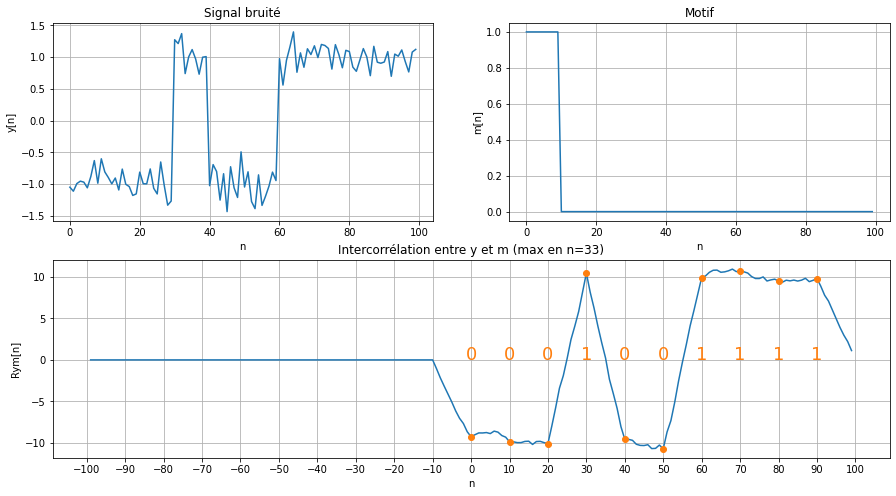

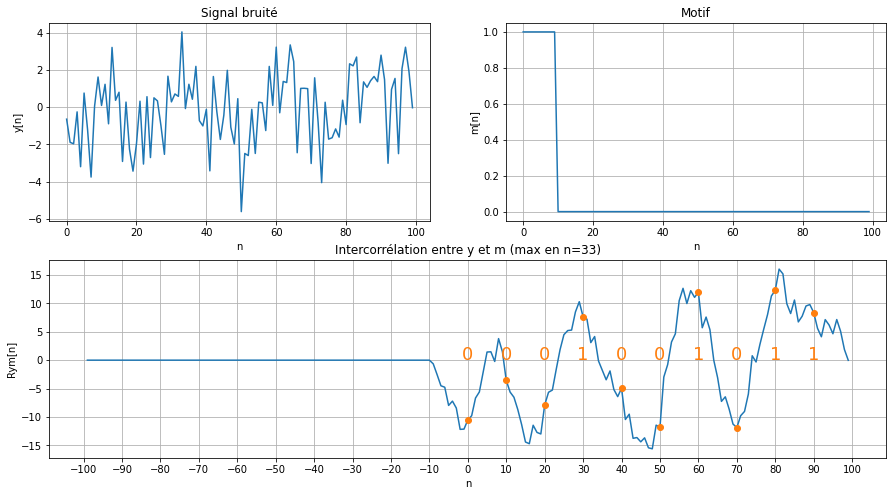

In [4]:
for i in range(2):
    
    # Chargement du message
    y = np.loadtxt(f'../_static/message{i+1}.csv')

    # Intercorrélation entre y et m
    Rym = np.correlate(y, m, mode='full')
    nn  = np.arange(-(N-1),N)
    idx = np.uint( np.arange(N-1,2*N-1,T) )

    # Affichage
    plt.figure(figsize=(15,8))

    plt.subplot(2,2,1)
    plt.plot(n,y)
    plt.xlabel('n')
    plt.ylabel('y[n]')
    plt.title('Signal bruité')

    plt.subplot(2,2,2)
    plt.plot(n,m)
    plt.xlabel('n')
    plt.ylabel('m[n]')
    plt.title('Motif')

    plt.subplot(2,1,2)
    plt.plot(nn,Rym)
    for i in idx:
        plt.text(nn[i], 0, '1' if Rym[i]>0 else '0', ha='center', color='C1', size=18)
        plt.plot(nn[i],Rym[i], 'C1o')
    plt.xticks(np.arange(-N, N+1, T))
    plt.xlabel('n')
    plt.ylabel('Rym[n]')
    plt.title(f"Intercorrélation entre y et m (max en n={int(nn[imax])})")

    plt.show()